In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
cd=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/crime%20data.csv")
cd.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
cd=cd.rename({"Unnamed: 0":"State"},axis=1)
cd.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
array=cd.iloc[:,1:]
array.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [6]:
sc=StandardScaler()
scf=sc.fit_transform(array)

In [7]:
db=DBSCAN(eps=1.5,min_samples=5)
cls=db.fit_predict(scf)

In [8]:
set(db.labels_)

{-1, 0}

In [9]:
cd["cluster_ID"]=db.labels_
cd.head()

,State,Murder,Assault,UrbanPop,Rape,cluster_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [10]:
cd.sort_values(by="cluster_ID").head()

,State,Murder,Assault,UrbanPop,Rape,cluster_ID
1,Alaska,10.0,263,48,44.5,-1
0,Alabama,13.2,236,58,21.2,0
27,Nevada,12.2,252,81,46.0,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0


In [11]:
cd.groupby("cluster_ID").agg(["mean"]).reset_index()

<ipython-input-11-eb0a6f16f93c>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cd.groupby("cluster_ID").agg(["mean"]).reset_index()


,cluster_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.000000,263.000000,48.000000,44.500000
1,0,7.742857,168.877551,65.897959,20.757143


In [12]:
cd[cd.cluster_ID==0].tail()

,State,Murder,Assault,UrbanPop,Rape,cluster_ID
45,Virginia,8.5,156,63,20.7,0
46,Washington,4.0,145,73,26.2,0
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0
49,Wyoming,6.8,161,60,15.6,0


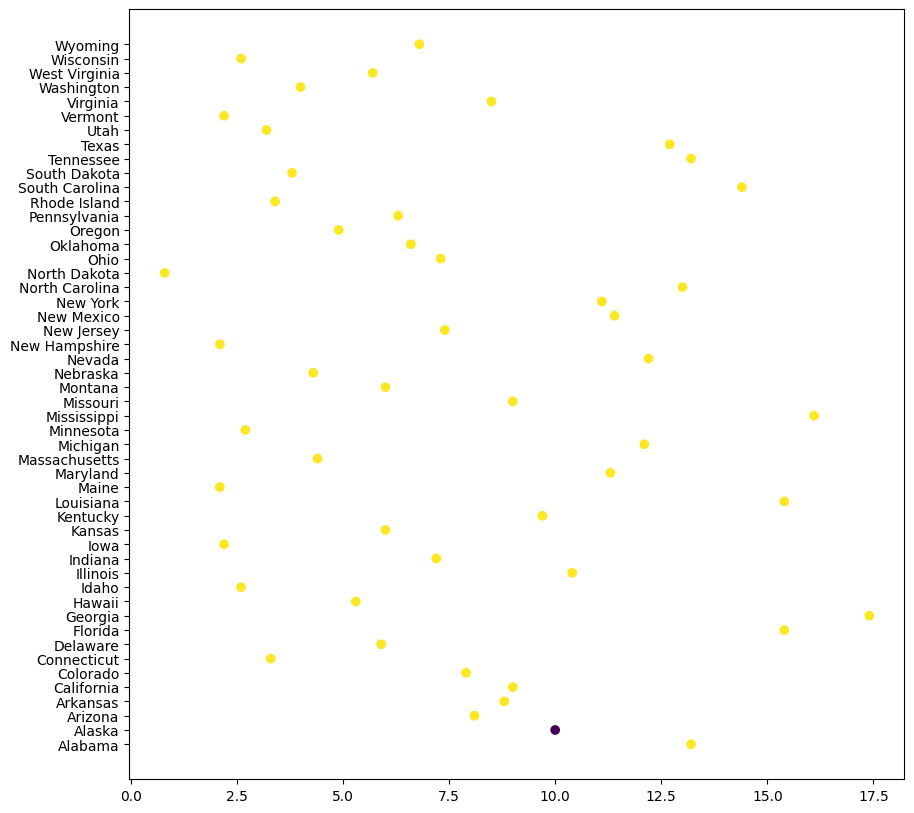

In [13]:
fig=plt.figure(figsize=(10,10))
plt.scatter(cd.Murder,cd.State,c=db.labels_)
plt.show()

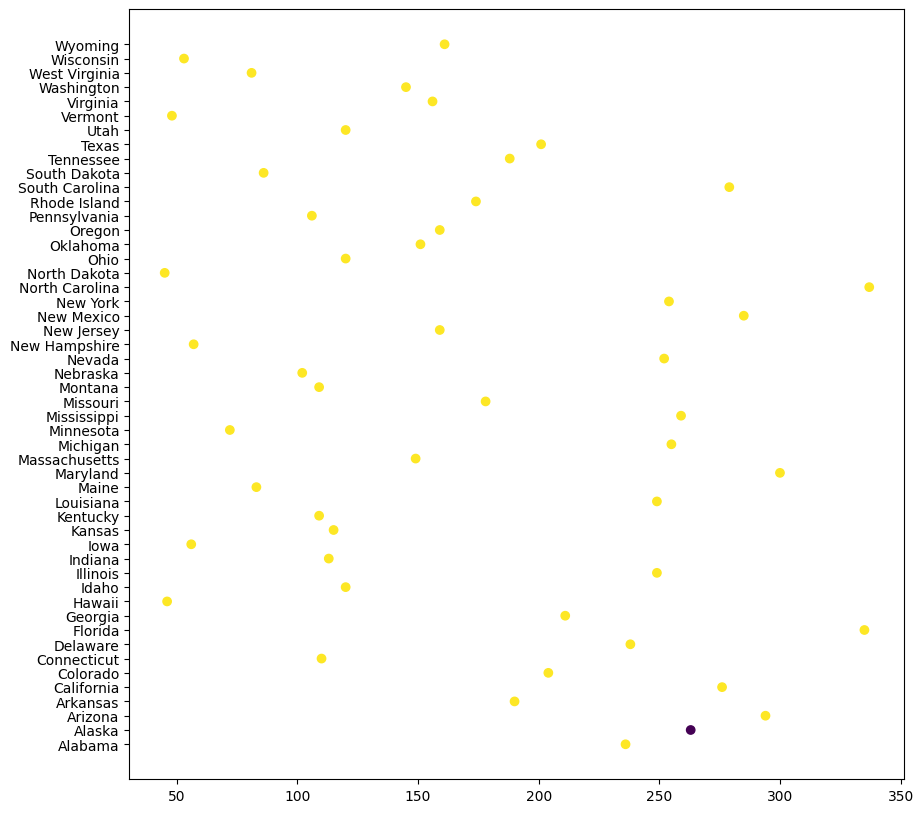

In [14]:
fig=plt.figure(figsize=(10,10))
plt.scatter(cd.Assault,cd.State,c=db.labels_)
plt.show()

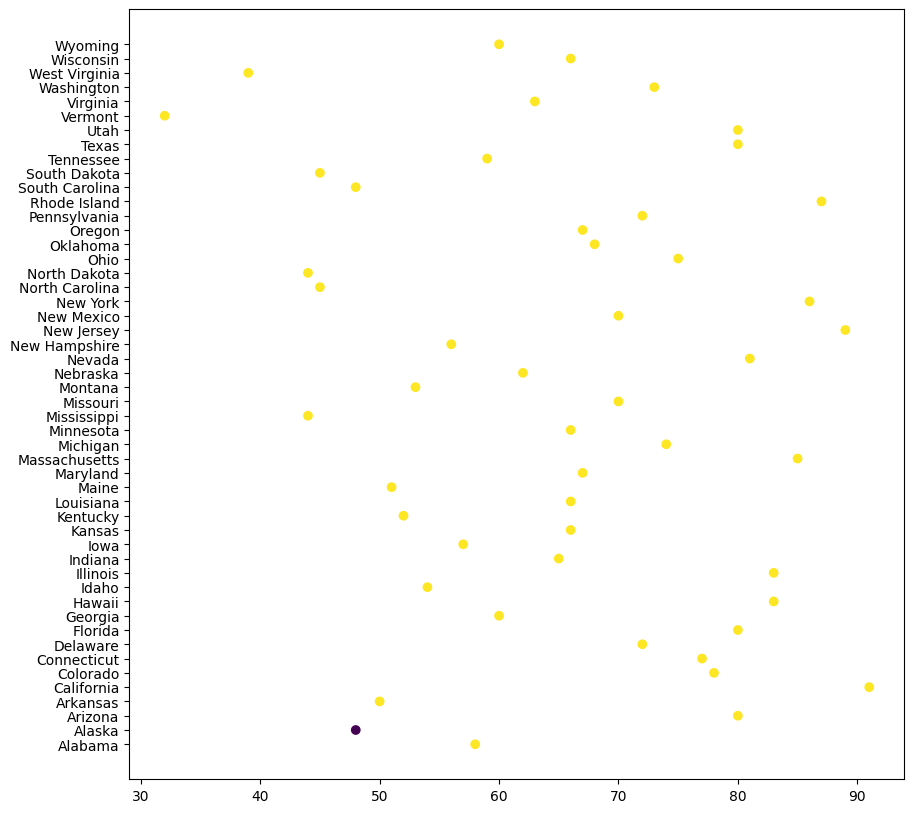

In [15]:
fig=plt.figure(figsize=(10,10))
plt.scatter(cd.UrbanPop,cd.State,c=db.labels_)
plt.show()

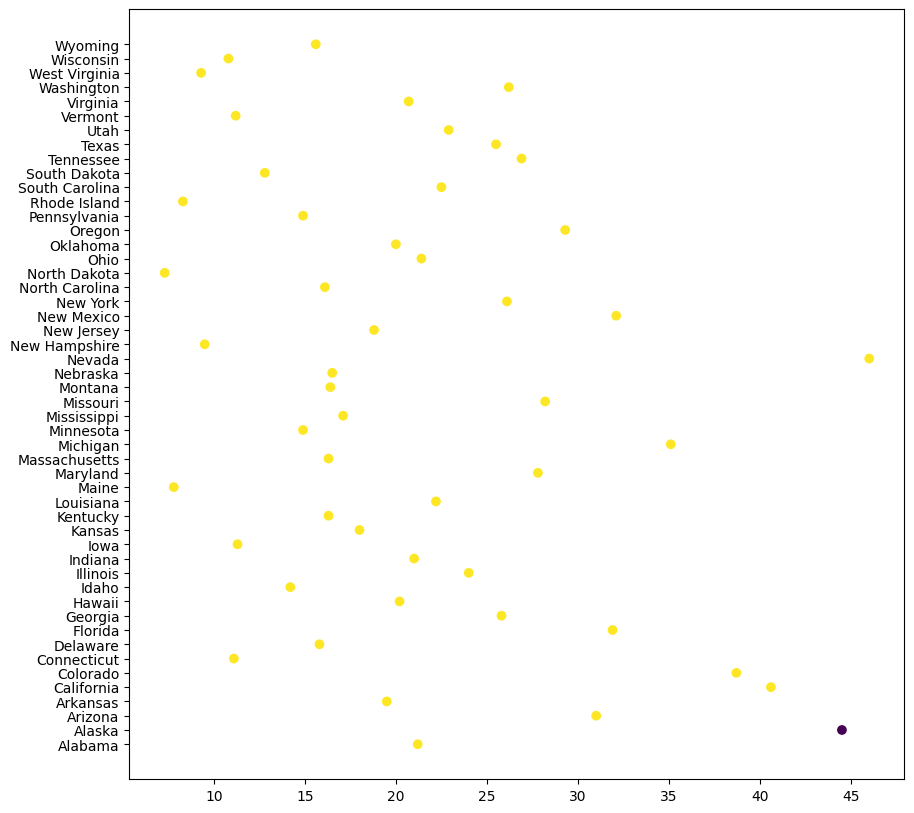

In [16]:
fig=plt.figure(figsize=(10,10))
plt.scatter(cd.Rape,cd.State,c=db.labels_)
plt.show()

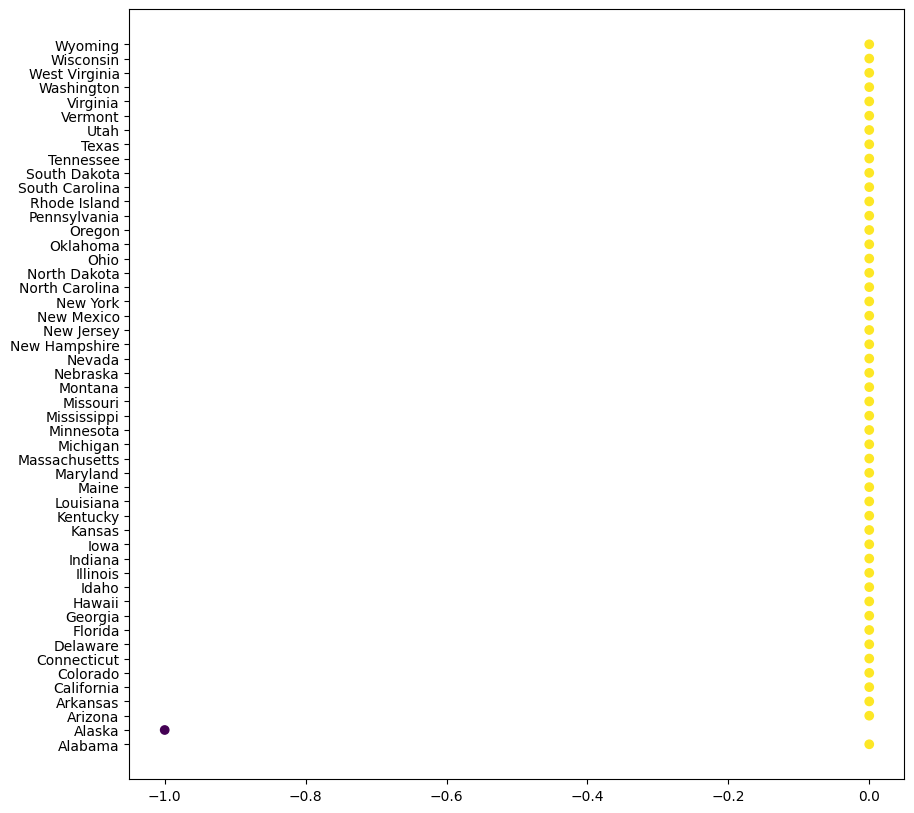

In [17]:
fig=plt.figure(figsize=(10,10))
plt.scatter(cd.cluster_ID,cd.State,c=db.labels_)
plt.show()

**Inference:**
As the Urban population is high in most of the states, it has some positive impact as Assaults are moderately high but do end up in Murder in many cases. The Rape count is low in most states. We can possibly conclude that assault is the reason and must be acted upon. The cluster "-1" seems to have a moderate range in all the activities of crime, whereas the cluster "0" has a varied range.  

**KMeans**

In [42]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [21]:
crime_data=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/crime%20data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [22]:
crime_data=crime_data.rename({"Unnamed: 0":"State"},axis=1)
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
array1=crime_data.iloc[:,1:]
array1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [47]:
sc=StandardScaler()
sc_df=pd.DataFrame(sc.fit_transform(array1),columns=array1.columns)
sc_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [48]:
kmc=KMeans(n_clusters=5,random_state=34)
kmc.fit(sc_df)

KMeans(n_clusters=5, random_state=34)

In [49]:
set(kmc.labels_)

{0, 1, 2, 3, 4}

In [50]:
crime_data["clusterID"]=kmc.labels_
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


In [65]:
crime_data.sort_values(by="clusterID").tail()

,State,Murder,Assault,UrbanPop,Rape,clusterID
17,Louisiana,15.4,249,66,22.2,4
41,Tennessee,13.2,188,59,26.9,4
9,Georgia,17.4,211,60,25.8,4
32,North Carolina,13.0,337,45,16.1,4
0,Alabama,13.2,236,58,21.2,4


In [52]:
crime_data.groupby("clusterID").agg(["mean"]).reset_index()

,clusterID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,2.680000,70.100000,51.000000,10.910000
1,1,10.815385,257.384615,76.000000,33.192308
2,2,4.955556,125.444444,80.111111,17.788889
3,3,6.790909,145.727273,61.636364,19.009091
4,4,14.671429,251.285714,54.285714,21.685714


In [53]:
crime_data[crime_data["clusterID"]==4]

,State,Murder,Assault,UrbanPop,Rape,clusterID
0,Alabama,13.2,236,58,21.2,4
9,Georgia,17.4,211,60,25.8,4
17,Louisiana,15.4,249,66,22.2,4
23,Mississippi,16.1,259,44,17.1,4
32,North Carolina,13.0,337,45,16.1,4
39,South Carolina,14.4,279,48,22.5,4
41,Tennessee,13.2,188,59,26.9,4


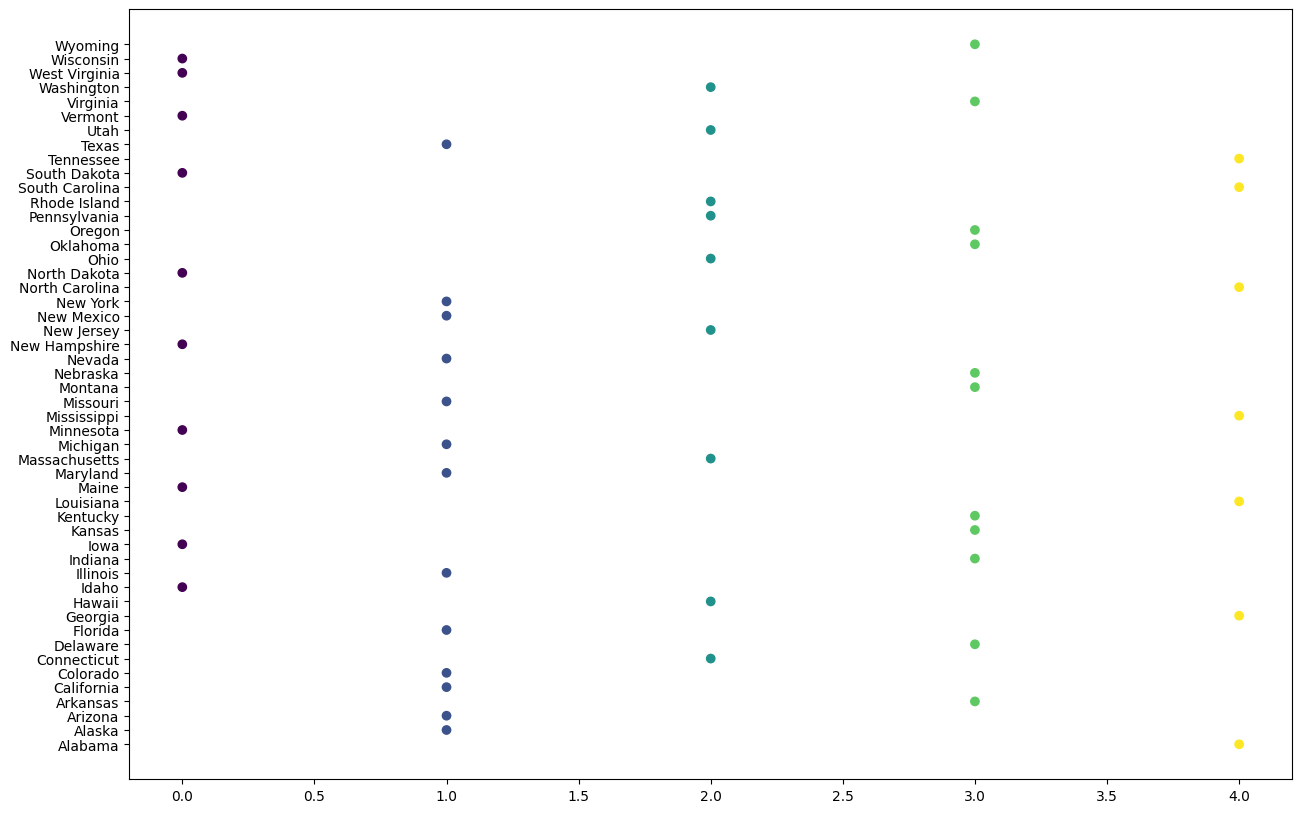

In [54]:
fig=plt.figure(figsize=(15,10))
plt.scatter(crime_data.clusterID,crime_data.State,c=kmc.labels_)

**Heirarchical Clustering**

In [43]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [44]:
cdata=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/crime%20data.csv")
cdata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [45]:
cdata=cdata.rename({"Unnamed: 0":"State"},axis=1)
cdata.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
array2=cdata.iloc[:,1:]
array2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [56]:
cdata_norm=pd.DataFrame(normalize(array2),columns=array2.columns)
cdata_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


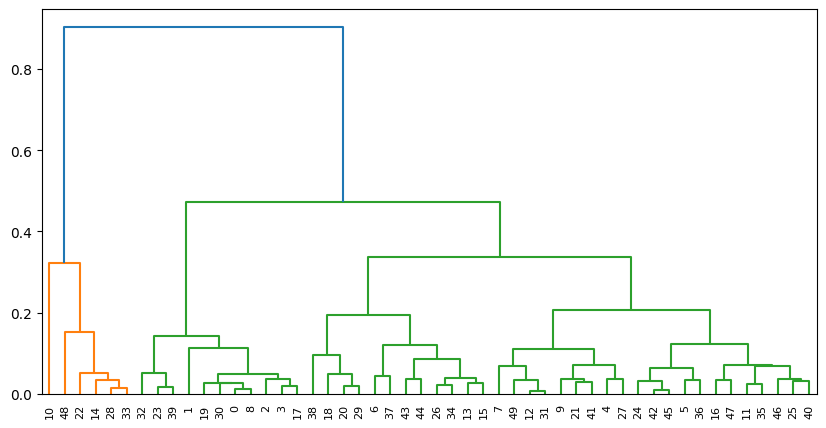

In [67]:
fig=plt.figure(figsize=(10,5))
den=sch.dendrogram(sch.linkage(cdata_norm,"complete"))

In [58]:
acluster=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="ward")
acluster

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [59]:
y=pd.DataFrame(acluster.fit_predict(cdata_norm),columns=["clusters_ID"])
y["clusters_ID"].value_counts()

0    24
2    20
1     6
Name: clusters_ID, dtype: int64

In [60]:
cdata["clusters_ID"]=acluster.labels_
cdata.head()

,State,Murder,Assault,UrbanPop,Rape,clusters_ID
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2


In [64]:
cdata.sort_values("clusters_ID").head()

,State,Murder,Assault,UrbanPop,Rape,clusters_ID
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
35,Oklahoma,6.6,151,68,20.0,0
26,Nebraska,4.3,102,62,16.5,0
25,Montana,6.0,109,53,16.4,0


In [63]:
cdata[cdata["clusters_ID"]==2].head()

,State,Murder,Assault,UrbanPop,Rape,clusters_ID
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,2


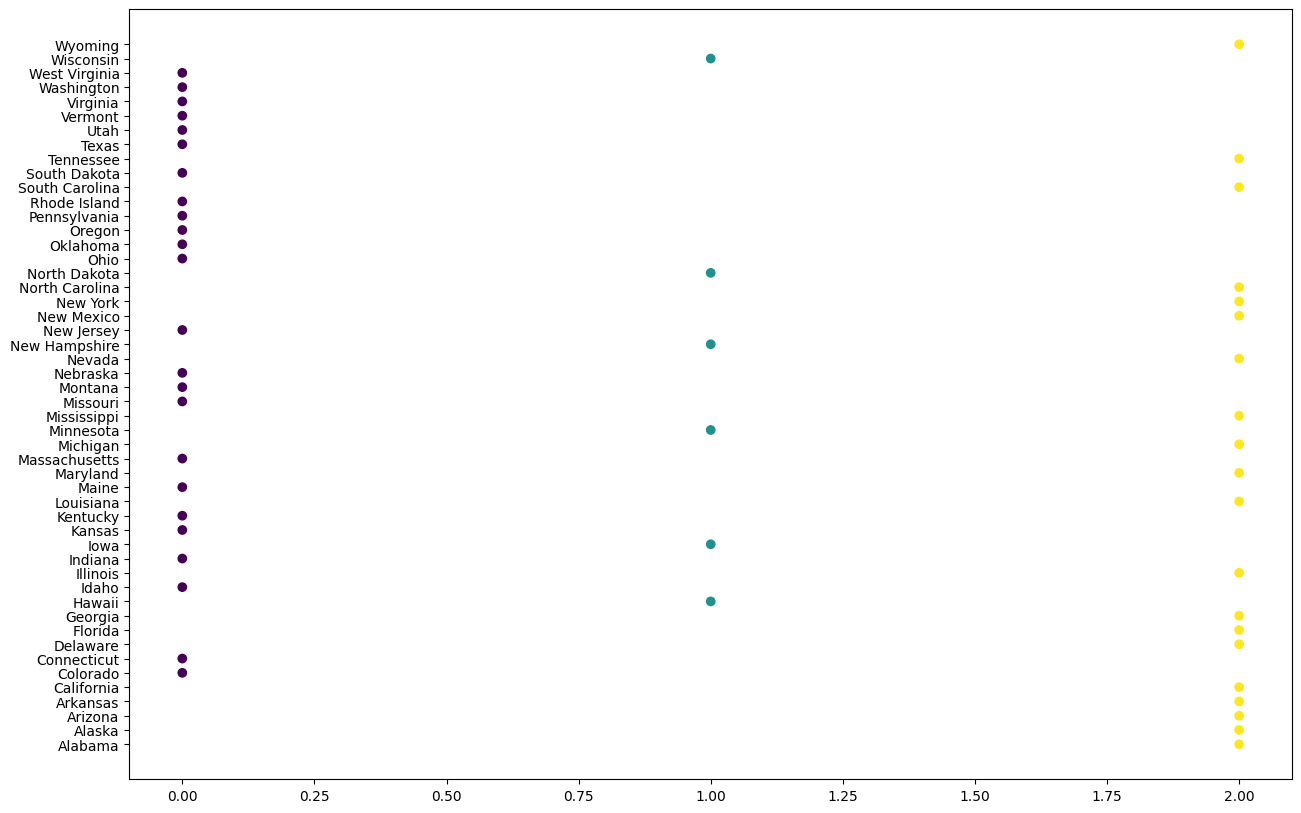

In [66]:
fig=plt.figure(figsize=(15,10))
plt.scatter(cdata.clusters_ID,cdata.State,c=acluster.labels_)